# SLO Twitter Data Analysis  - Tweet #Hashtag Statistics

Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [3]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions_v2 as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-22-19-fixed.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Subtitle Placeholder:

<span style="font-family:Papyrus; font-size:1.25em;">

Plots the number of hashtags Tweets possess against the percentage of all Tweets associated with a given company that possess that number of hashtags.<br>

</span>

The Number of Hashtags within each Tweet:
Hashtag Count for Tweets by Percentage of All Tweets Associated with a Given Company:


<Figure size 432x288 with 0 Axes>

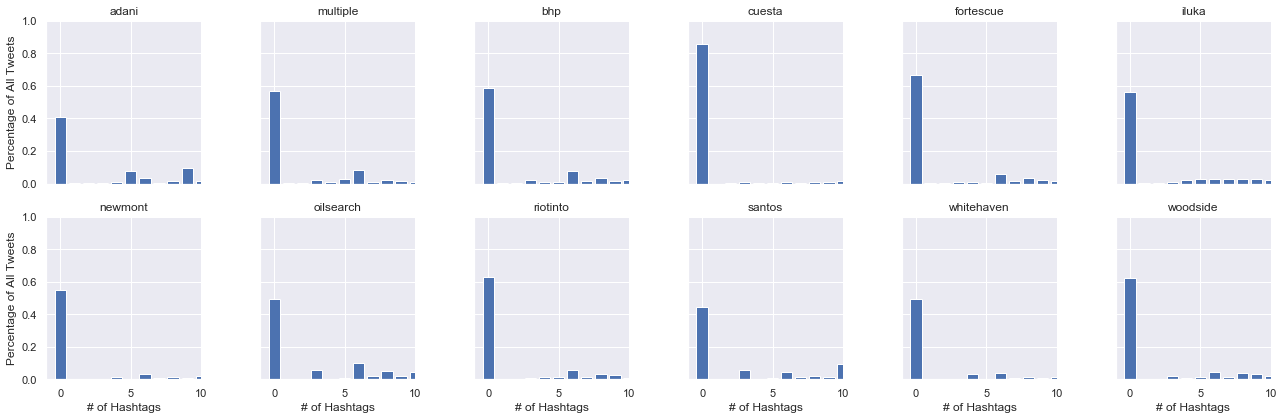

In [6]:
    print(f"The Number of Hashtags within each Tweet:")
    tweet_dataframe['#hashtags'] = tweet_dataframe['tweet_entities_hashtags'].apply(
        lambda x: len(x) if x is not None and not isinstance(x, float) else 0)
    # companies = df['company']

    print("Hashtag Count for Tweets by Percentage of All Tweets Associated with a Given Company:")
    plt.figure()
    grid = sns.FacetGrid(
        tweet_dataframe[['#hashtags', 'company_derived_designation']], col='company_derived_designation', col_wrap=6,
        ylim=(0, 1), xlim=(-1, 10))
    grid.map_dataframe(tweet_util_v2.bar_plot, '#hashtags')
    grid.set_titles('{col_name}')
    grid.set_xlabels("# of Hashtags").set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

A not inconsiderable portion of Tweets for each company have no associated hashtags.  A few have quite a few.<br>

</span>

## Subtitle Placeholder:

In [9]:
    has_hashtag = tweet_dataframe['tweet_entities_hashtags'].count()
    print(f"The number of Tweets with hashtags is {has_hashtag}")
    print(f"The percentage of Tweets with hashtags is {has_hashtag / tweet_dataframe.shape[0] * 100.0}")

The number of Tweets with hashtags is 367220
The percentage of Tweets with hashtags is 54.77412868832653


<span style="font-family:Papyrus; font-size:1.25em;">

Overall, around half of our Tweets possesss a hashtag of some sort.<br>

</span>